In [40]:
# import and constants div
from math import inf, log2, ceil, floor
import matplotlib.pyplot as plt
from prettytable import PrettyTable

FIVE_PRACTICE_WORK = [-0.34, -0.73, 0.69, 0.55, 1.11, 0.62, 0.93, 0.42,
                      1.00, -0.48, 0.92, 0.51, -1.05, -1.41, 1.04, -1.03, 1.55, -0.17, 0.92, 0.17]

EPSILON = 0.0000001
FIRST = 0
LAST = -1


def round3(x):
    return round(x, 2)


In [41]:
# first calculatings



selection = IHT19_1_30V
n = len(selection)

variation_series = sorted(selection)

discret_statictic_series = {}
for i in variation_series:
    if i in discret_statictic_series:
        discret_statictic_series[i] += 1
    else:
        discret_statictic_series[i] = 1


Expected_value = sum([value*(count/n)
                     for value, count in discret_statictic_series.items()])

Ranking = variation_series[LAST]-variation_series[FIRST]

D = sum([count*(value-Expected_value)**2 for value,
        count in discret_statictic_series.items()])/n
σ = D ** (1/2)

S = (n/(n-1)*D)**(1/2)
M_o_count = -inf
M_o = -inf
for value, count in discret_statictic_series.items():
    if M_o_count < count:
        M_o = value
        M_o_count = count

M_e = inf
if n % 2 == 0:
    M_e = (variation_series[(n-1)//2]+variation_series[(n-1)//2+1])/2
else:
    M_e = variation_series[(n-1)//2]


In [42]:
#

m = ceil(1+log2(n))
h = (max(variation_series)-min(variation_series))/m

intervals = [round3(variation_series[FIRST])]
while intervals[LAST]+h/2 < variation_series[LAST]:
    intervals.append(round3(intervals[LAST]+h))
intervals_weight = [FIRST]


intervals_iter = iter(intervals)
centre_of_the_gap = next(intervals_iter)
for i in variation_series:
    if abs(i-centre_of_the_gap) < h/2:
        intervals_weight[LAST] += 1
    else:
        intervals_weight.append(1)
        centre_of_the_gap = next(intervals_iter)

intervals_weight_normalized = [i/n for i in intervals_weight]
intervals_weight_normalized_based = [round3(sum(
    intervals_weight_normalized[:i+1])) for i in range(len(intervals_weight_normalized))]


In [43]:
# format printing
# distribution_law = PrettyTable(
#     ["intervals"]+[("[{}, {})".format(round3(i-h/2), round3(i+h/2))) for i in intervals[:4]])
# distribution_law.add_row(["frequencies"]+intervals_weight_normalized[:4])
# print(distribution_law)
# distribution_law = PrettyTable(
#     ["intervals"]+[("[{}, {})".format(round3(i-h/2), round3(i+h/2))) for i in intervals[4:]])
# distribution_law.add_row(["frequencies"]+intervals_weight_normalized[4:])
# print(distribution_law)
# distribution_law = PrettyTable()


distribution_law = PrettyTable(
    ["intervals"]+[("[{}, {})".format(round3(i-h/2), round3(i+h/2))) for i in intervals])
distribution_law.add_row(["frequencies"]+intervals_weight_normalized)
print(distribution_law)


print("Expected value is ", round3(Expected_value))
print("Dispersion is ", round3(D))
print("Standard deviation is ", round3(σ))
print("S = ", round3(S))
print("Ranking is ", round3(Ranking))
print("Mode is ", round3(M_o))
print("Median is = ", round3(M_e))


+-------------+---------------+----------------+----------------+----------------+----------------+-----------------+------------------+------------------+------------------+
|  intervals  | [9.12, 24.88) | [24.88, 40.62) | [40.62, 56.38) | [56.38, 72.12) | [72.12, 87.88) | [87.88, 103.62) | [103.62, 119.38) | [119.38, 135.12) | [135.12, 150.88) |
+-------------+---------------+----------------+----------------+----------------+----------------+-----------------+------------------+------------------+------------------+
| frequencies |      0.03     |      0.07      |      0.12      |      0.15      |      0.26      |       0.16      |       0.13       |       0.07       |       0.01       |
+-------------+---------------+----------------+----------------+----------------+----------------+-----------------+------------------+------------------+------------------+
Expected value is  79.13
Dispersion is  769.91
Standard deviation is  27.75
S =  27.89
Ranking is  126
Mode is  85
Median is 

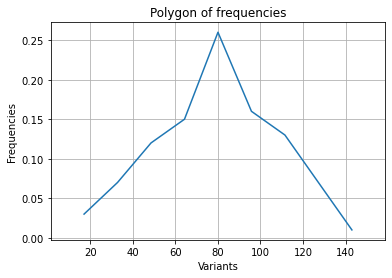

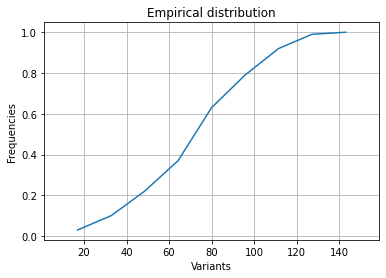

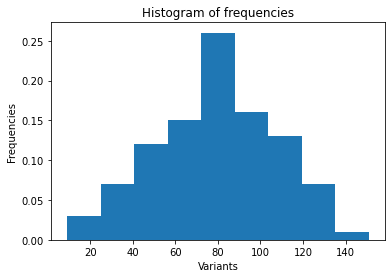

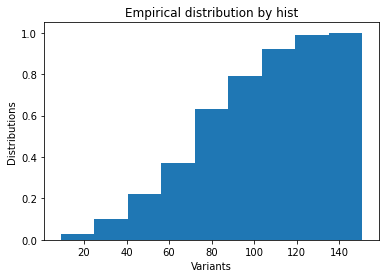

In [45]:
# plotting

plt.plot(intervals, intervals_weight_normalized)
plt.xlim(min(intervals)-h, max(intervals)+h)
plt.ylabel('Frequencies')
plt.xlabel('Variants')
plt.title('Polygon of frequencies')
plt.grid()
plt.show()

plt.plot(intervals, intervals_weight_normalized_based)
plt.xlim(min(intervals)-h, max(intervals)+h)
plt.ylabel('Frequencies')
plt.xlabel('Variants')
plt.title('Empirical distribution')
plt.grid()
plt.show()

plt.bar(intervals, intervals_weight_normalized, width=h)
plt.xlim(min(intervals)-h, max(intervals)+h)
plt.ylabel('Frequencies')
plt.xlabel('Variants')
plt.title('Histogram of frequencies')
plt.show()

plt.bar(intervals, intervals_weight_normalized_based, width=h)
plt.xlim(min(intervals)-h, max(intervals)+h)
plt.ylabel('Distributions')
plt.xlabel('Variants')
plt.title('Empirical distribution by hist')
plt.show()
